In [21]:
# IMPORTING LIBRARIES
import numpy as np       # Importing the numpy library
import pandas as pd      # Importing the pandas library
import matplotlib.pyplot as plt # Importing the matplotlib library
# !pip install seaborn
import seaborn as sb    # Importing the seaborn library
# !pip install statsmodels
import statsmodels.api as sm # Importing the statsmodels library

#### QUESTION 1

In [22]:
# READING IN THE csv - historical daily weather data for France in 2017
franceWeather = pd.read_csv('Paris_weather_data_2017.csv', encoding='latin1', parse_dates=True)

# SEE IF THERE ARE NANS and EMPTY FIELDS
franceWeather.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 365 entries, 0 to 364
Data columns (total 21 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Date                         365 non-null    object 
 1   high Temp. (°C)              365 non-null    int64  
 2   avg Temp. (°C)               365 non-null    int64  
 3   low Temp. (°C)               365 non-null    int64  
 4   high Dew Point (°C)          365 non-null    int64  
 5   avg Dew Point (°C)           365 non-null    int64  
 6   low Dew Point (°C)           365 non-null    int64  
 7   high Humidity (%)            365 non-null    int64  
 8   avg Humidity (%)             365 non-null    int64  
 9   low Humidity (%)             365 non-null    int64  
 10  high Sea Level Press. (hPa)  365 non-null    int64  
 11  avg Sea Level Press. (hPa)   365 non-null    int64  
 12  low Sea Level Press. (hPa)   365 non-null    int64  
 13  high Visibility (km)

In [23]:
# Filling the fields with the "-" character in the data with Nans
interpWeather = franceWeather.replace('-', np.nan)

# Filling any gaps & nans in the data using linear interpolation
interpWeather1 = interpWeather.interpolate(method = 'linear', axis = 0).ffill().bfill()

# Dropping "high Gust Wind\xa0(km/h)", "Events" columns - because they have nan values and string object
interpWeather1 = interpWeather1.drop(['high Gust Wind\xa0(km/h)', 'Events'], axis = 1)

interpWeather1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 365 entries, 0 to 364
Data columns (total 19 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Date                         365 non-null    object 
 1   high Temp. (°C)              365 non-null    int64  
 2   avg Temp. (°C)               365 non-null    int64  
 3   low Temp. (°C)               365 non-null    int64  
 4   high Dew Point (°C)          365 non-null    int64  
 5   avg Dew Point (°C)           365 non-null    int64  
 6   low Dew Point (°C)           365 non-null    int64  
 7   high Humidity (%)            365 non-null    int64  
 8   avg Humidity (%)             365 non-null    int64  
 9   low Humidity (%)             365 non-null    int64  
 10  high Sea Level Press. (hPa)  365 non-null    int64  
 11  avg Sea Level Press. (hPa)   365 non-null    int64  
 12  low Sea Level Press. (hPa)   365 non-null    int64  
 13  high Visibility (km)

#### QUESTION 2

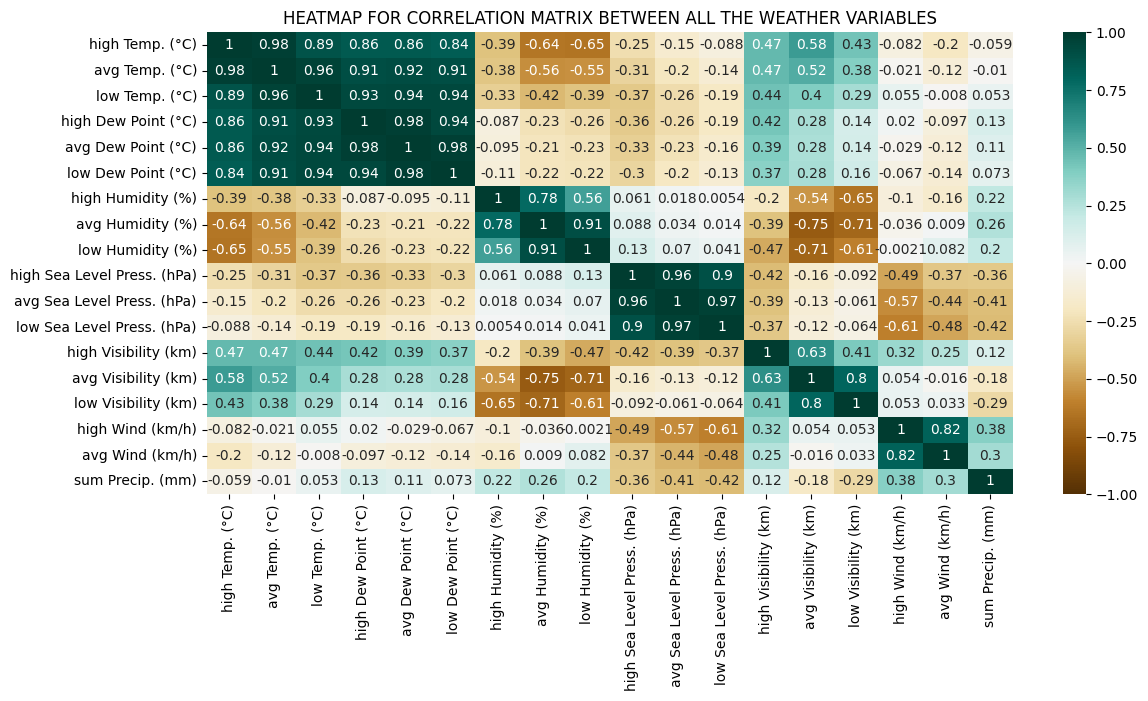

In [24]:
# Calculate the correlation matrix between all the weather variables
weatherNoDate = interpWeather1.drop(['Date'], axis = 1) 
corrMatrix = weatherNoDate.corr()

# show the correlation matrix as a heat-map using seaborn
plt.rcParams['figure.figsize'] = (13, 6)
heatMap = sb.heatmap(corrMatrix, vmin = -1, vmax = 1, cmap = 'BrBG', annot = True)
plt.title('HEATMAP FOR CORRELATION MATRIX BETWEEN ALL THE WEATHER VARIABLES')
plt.show()

#### QUESTION 3

In [25]:
# Reading in the csv data for historical daily electricity consumption data for France
histEngergy = pd.read_csv('Historique_consommation_JOUR_2017.csv', parse_dates = True, skiprows = 7)

# Extracting the columns that we need for the analysis
energyToUse = histEngergy[['Date', 'Type de données', 'Energie journalière (MWh)']]
energyToUse

,Date,Type de données,Energie journalière (MWh)
0,NaN,NaN,NaN
1,01/01/2017,Définitives,1652084.0
2,02/01/2017,Définitives,1768332.0
3,03/01/2017,Définitives,1886120.0
4,04/01/2017,Définitives,1923775.0
...,...,...,...
372,27/12/2017,Définitives,1582970.0
373,28/12/2017,Définitives,1664743.0
374,29/12/2017,Définitives,1668623.0
375,30/12/2017,Définitives,1437082.0


In [26]:
# Drop empty rows and reset the index to start from 0 again to avoid gaps
energyToUse = energyToUse.dropna().reset_index(drop = True)
energyToUse.head()

,Date,Type de données,Energie journalière (MWh)
0,01/01/2017,Définitives,1652084.0
1,02/01/2017,Définitives,1768332.0
2,03/01/2017,Définitives,1886120.0
3,04/01/2017,Définitives,1923775.0
4,05/01/2017,Définitives,1887470.0


#### QUESTION 4

In [27]:
# Change the dates of interpWeather1 to timestamps
interpWeather1['Date'] = interpWeather1['Date'].apply(lambda x: pd.to_datetime(x, format = '%m/%d/%Y'))

# Change the dates of energyToUse to timestamps
energyToUse['Date'] = energyToUse['Date'].apply(lambda x: pd.to_datetime(x, format = '%d/%m/%Y'))

# Synchronise the dates corresponding to both time series
synchronized = pd.merge(interpWeather1, energyToUse, on = 'Date', how = 'inner')

# Setting the date as the index of the dataframe
synchronized = synchronized.set_index('Date')
synchronized.head()

,high Temp. (°C),avg Temp. (°C),low Temp. (°C),high Dew Point (°C),avg Dew Point (°C),low Dew Point (°C),high Humidity (%),avg Humidity (%),low Humidity (%),high Sea Level Press. (hPa),avg Sea Level Press. (hPa),low Sea Level Press. (hPa),high Visibility (km),avg Visibility (km),low Visibility (km),high Wind (km/h),avg Wind (km/h),sum Precip. (mm),Type de données,Energie journalière (MWh)
Date,,,,,,,,,,,,,,,,,,,,
2017-01-01,0,-3,-5,-1,-3,-6,100,94,86,1030,1023,1020,7.0,3.0,0.0,10,6,0,Définitives,1652084.0
2017-01-02,2,0,-2,1,1,-1,100,95,88,1030,1025,1022,14.0,4.0,0.0,16,6,2,Définitives,1768332.0
2017-01-03,1,0,-1,1,0,-1,100,95,88,1032,1030,1028,7.0,2.0,0.0,14,6,0,Définitives,1886120.0
2017-01-04,6,2,-1,4,1,-1,100,87,71,1028,1025,1023,19.0,9.0,3.0,23,14,2,Définitives,1923775.0
2017-01-05,7,3,1,2,0,-2,93,79,59,1038,1032,1027,19.0,12.0,10.0,14,11,0,Définitives,1887470.0


Minimum mean temperature: -3 °C Maximum mean temperature: 28 °C
Minimum energy consumption: 873166.0 MWh Maximum energy consumption: 2080679.0 MWh


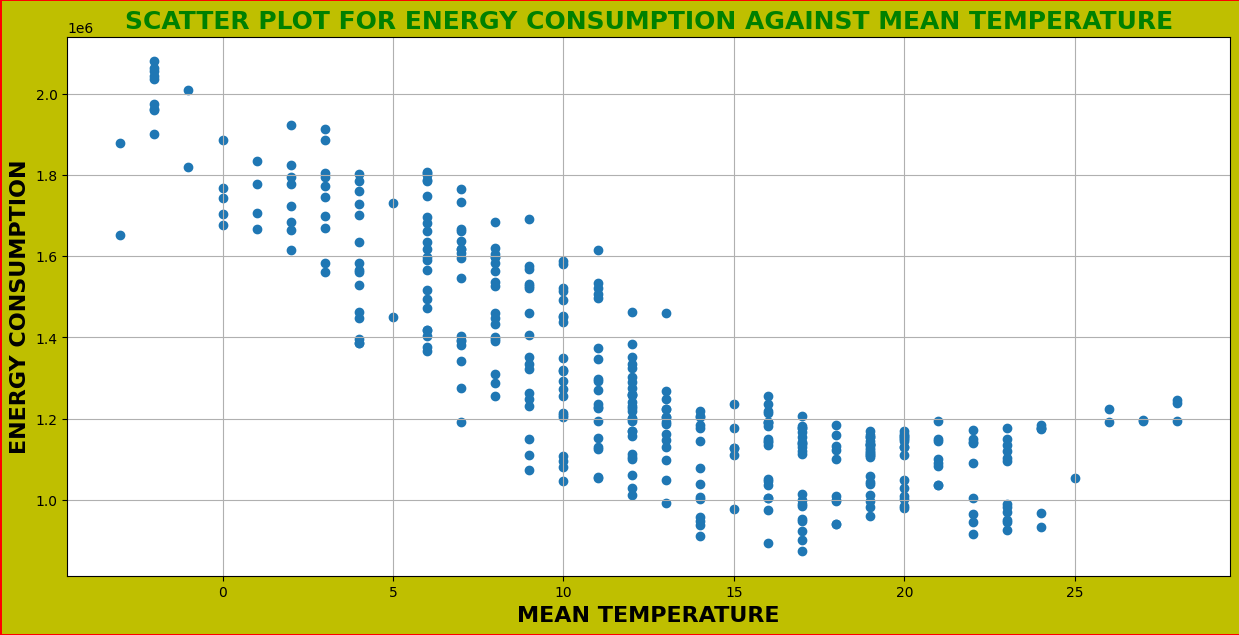

In [28]:
# Extracting energy consumption column from synchronized
energyConsp = synchronized['Energie journalière (MWh)']

# Extract the mean temperature (avg Temp. (°C)). Note: the name has special characters
# \xa0 is a non-breaking space character in Latin1 (ISO 8859-1) encoding - prevents an automatic line break at its position.
meanTemp = synchronized['avg Temp.\xa0(°C)']

# Minimums and maximums of the mean temperature and energy consumption
print('Minimum mean temperature:', meanTemp.min(), '°C', 'Maximum mean temperature:', meanTemp.max(), '°C')
print('Minimum energy consumption:', energyConsp.min(), 'MWh', 'Maximum energy consumption:', energyConsp.max(), 'MWh')

# Making a scatter plot of energy consumption against mean temperature 
plt.figure(figsize = (15, 7), edgecolor = 'r', facecolor = 'y', linewidth = 1)
plt.scatter(meanTemp, energyConsp)

plt.title('SCATTER PLOT FOR ENERGY CONSUMPTION AGAINST MEAN TEMPERATURE', color = "g", fontsize = 18, fontweight = "bold")
plt.xlabel('MEAN TEMPERATURE', color = "black", fontsize = 16, fontweight = "bold")
plt.ylabel('ENERGY CONSUMPTION', color = "black", fontsize = 16, fontweight = "bold")

plt.grid()
plt.show()

#### QUESTION 5

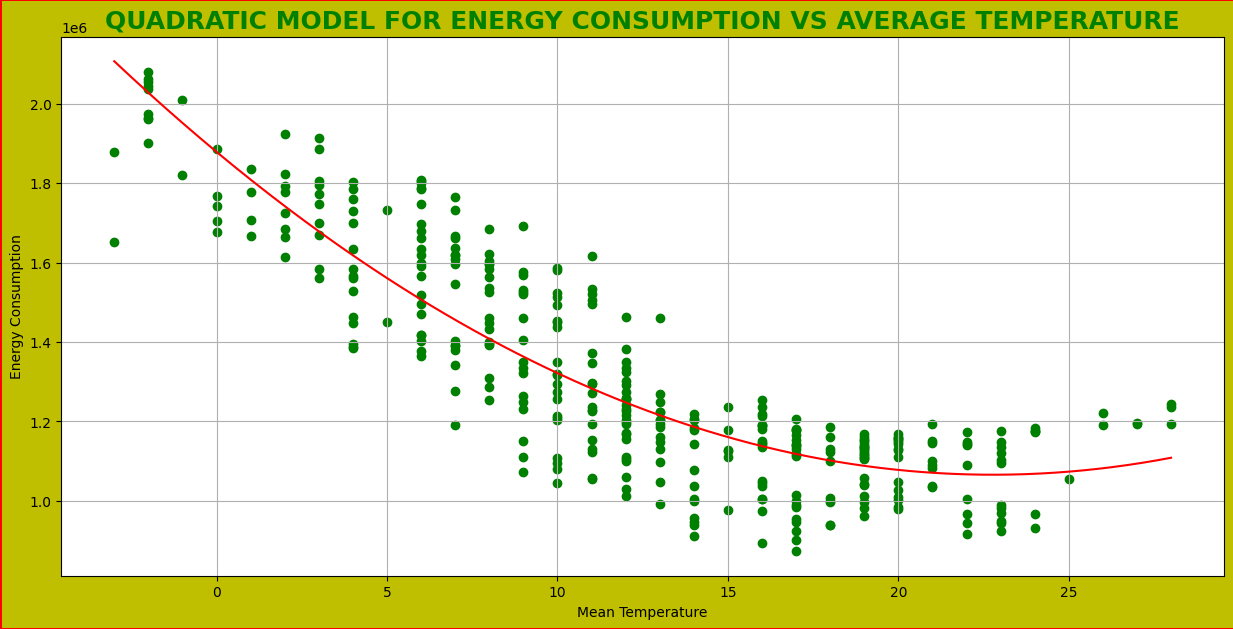

In [29]:
# Fitting a quadratic (polynomial) model to the energy versus temp: form y = a2x^2+a1x+a0
# where a2, a1 and a0 are coefficients that minimize the square error.
# The coefficients of a polynomial equation
coeffs = np.polyfit(meanTemp, energyConsp, 2)

# Create the polynomial object - The polynomial model object
model = np.poly1d(coeffs)

# Generate points for the plotted function - evenly spaced numbers (n or len) btn interval(min-max)
xPoints = np.linspace(meanTemp.min(), meanTemp.max(), len(meanTemp))

# yPoints CORRESPONSING TO THE xPoints generated above
yPoints = model(xPoints)

# GRAPH PROPERTIES
plt.figure(figsize = (15, 7), edgecolor = 'r', facecolor = 'y', linewidth = 1)
plt.title('QUADRATIC MODEL FOR ENERGY CONSUMPTION VS AVERAGE TEMPERATURE', color = "g", fontsize = 18, fontweight = "bold")

# Plot the quadratic fit as a line on top of the scatter plot.
# Plot the data points and the fitted polynomial
plt.scatter(meanTemp, energyConsp, color = 'g')
plt.plot(xPoints, yPoints, color = 'r')

plt.xlabel('Mean Temperature')
plt.ylabel('Energy Consumption')

plt.grid()
plt.show()

#### QUESTION 6

The minimum energy consumption is: 1065867.1469665153
The optimal temperature is: 22.804945054945055


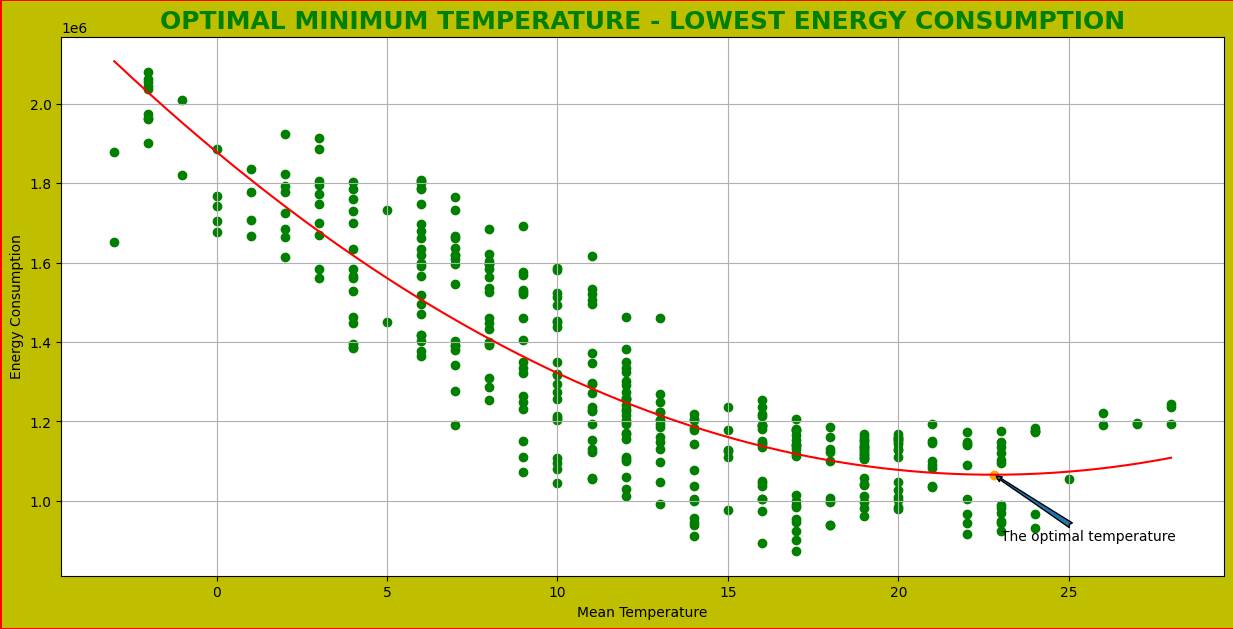

In [30]:
# FROM QUESTION 5 - IDENTIFY THE MINIMUM ENERGY CONSUMPTION
energyMinimum = min(yPoints)
print("The minimum energy consumption is:", energyMinimum)

# INDEX CORRESPONDING TO minimum value OF yPoints
minIndex = np.argmin(yPoints)

# USE THE INDEX OF THE Min Value for yPoints TO FIND xPoint CORRESPONDING TO min yPoint
optimalTemp = xPoints[minIndex]
print("The optimal temperature is:", optimalTemp)

# GRAPH PROPERTIES
plt.figure(figsize = (15, 7), edgecolor = 'r', facecolor = 'y', linewidth = 1)
plt.title('OPTIMAL MINIMUM TEMPERATURE - LOWEST ENERGY CONSUMPTION', color = "g", fontsize = 18, fontweight = "bold")

# Plot the quadratic fit as a line on top of the scatter plot.
# Plot the data points and the fitted polynomial
plt.scatter(meanTemp, energyConsp, color = 'g')
plt.plot(xPoints, yPoints, color = 'r')

plt.xlabel('Mean Temperature')
plt.ylabel('Energy Consumption')

plt.scatter(optimalTemp, energyMinimum, color = 'orange')
plt.annotate("The optimal temperature", xy = (optimalTemp, energyMinimum), xytext = (23, 900000), arrowprops = dict(arrowstyle = "fancy", connectionstyle = "arc3"), color = 'black')

plt.grid()
plt.show()

#### QUESTION 7

In [31]:
# Using a stepwise approach to find an optimal multivariate linear regression model using the weather variables to forecast consumption. 
energyConsp = synchronized['Energie journalière (MWh)'] # Extract the energy consumption
weatherX = synchronized.drop(['Energie journalière (MWh)', 'Type de données'], axis = 1) # Extract the weather variables

# COMPOSING A MODEL USING FORWARD SELECTION - forward_regression ()
# THE FORWARD STEPWISE REGRESSION - SELECTING PREDICTORS USING ORDINARY LEAST SQUARES
# OLS: finding the line of best fit through the data points that best represents the relationship between the X and y variables.

def forwardRegression(X, y, thresholdToBeIn, verbose = True):
    initialList = []
    inclusionList = list(initialList)

    modelOLS = sm.OLS(X, y)

    # Checking variables to be included
    while True:
        
        # Check if we are going to the next variable
        changed = False
        
        # Taking all columns and remove those in inclusion list
        allVariablesList = list(set(X.columns) - set(inclusionList))
        print(allVariablesList)
        
        # List for holding p-values
        currPValue = pd.Series(index = allVariablesList, dtype = 'float64')

        # Fit OLS model by adding a constant for every column in var list
        for colNew in allVariablesList:
            modelOLS = sm.OLS(y, sm.add_constant(pd.DataFrame(X[inclusionList + [colNew]]))).fit()
            currPValue[colNew] = modelOLS.pvalues[colNew] # p-value for current variable

        bestPValue = currPValue.min()             # Setting the lowest p-value

        # Selecting predictor with minimum value of p-value
        if bestPValue < thresholdToBeIn:          # Checking if the p-value is less than 0.05
            bestPredictor = currPValue.idxmin()   # Best predictor = current p value min index
            
            # Add it to the list of useful predictors
            inclusionList.append(bestPredictor)
            changed = True                        # Go to the next predictor to be checked

            if verbose:
                # Displaying real-time process message
                print('\n{:5} with p-value {:.4} is selected \n\n'.format(bestPredictor, bestPValue))
                print(inclusionList)

        if not changed:                           # When no predictor with p-value < 0.05, stop the process
            break

    # Returning the list of the useful predictors
    return inclusionList

# Calling the function
bestVars = forwardRegression(weatherX, energyConsp, 0.05)

print(f'\nFinal selected variables to be used are {len(bestVars)}:\n {bestVars}')

['avg Temp.\xa0(°C)', 'low Visibility\xa0(km)', 'avg Dew Point\xa0(°C)', 'avg Sea Level Press.\xa0(hPa)', 'high Dew Point\xa0(°C)', 'low Temp.\xa0(°C)', 'sum Precip.\xa0(mm)', 'avg Visibility\xa0(km)', 'avg Humidity\xa0(%)', 'high Sea Level Press.\xa0(hPa)', 'high Humidity\xa0(%)', 'low Sea Level Press.\xa0(hPa)', 'low Dew Point\xa0(°C)', 'high Temp.\xa0(°C)', 'low Humidity\xa0(%)', 'high Visibility\xa0(km)', 'avg Wind\xa0(km/h)', 'high Wind\xa0(km/h)']

high Temp. (°C) with p-value 1.822e-93 is selected 


['high Temp.\xa0(°C)']
['avg Temp.\xa0(°C)', 'low Visibility\xa0(km)', 'avg Dew Point\xa0(°C)', 'avg Sea Level Press.\xa0(hPa)', 'high Dew Point\xa0(°C)', 'low Temp.\xa0(°C)', 'sum Precip.\xa0(mm)', 'avg Visibility\xa0(km)', 'avg Humidity\xa0(%)', 'high Sea Level Press.\xa0(hPa)', 'high Humidity\xa0(%)', 'low Sea Level Press.\xa0(hPa)', 'low Dew Point\xa0(°C)', 'low Humidity\xa0(%)', 'high Visibility\xa0(km)', 'avg Wind\xa0(km/h)', 'high Wind\xa0(km/h)']

high Visibility (km) with p

In [32]:
# Calculating the coefficient of determination, R2
# Add a constant to the predictor variables
xConstant = sm.add_constant(weatherX[bestVars])

# creating OLS model
model = sm.OLS(energyConsp, xConstant).fit()  # Fit the model

# Finding and printing the coefficient of determination (R^2)
R2 = model.rsquared
print(f'The coefficient of determination (R^2) is {R2}')

The coefficient of determination (R^2) is 0.7506437341112864


#### QUESTION 8

In [33]:
# Increasing the number of explanatory variables by also considering squared terms for eachweather variable. 
# The usage of a stepwise approach to obtain a new model.  

# Squaring all the weather variables values
squaredWeatherX = weatherX ** 2 

# Renaming the columns of the squared weather variables to include the word squared
squaredWeatherX = squaredWeatherX.rename(columns = lambda x : str(x) + '_squared')

# adding the squared weather variables to the weather variables
mergedWeatherX = pd.concat([weatherX, squaredWeatherX], axis = 1)

# Selecting the best features using forward regression
mergedBestVars = forwardRegression(mergedWeatherX, energyConsp, 0.05)

print(f'\nFinal selected variables to be used are {len(mergedBestVars)}:\n {mergedBestVars}')

['avg Dew Point\xa0(°C)_squared', 'low Visibility\xa0(km)', 'low Visibility\xa0(km)_squared', 'high Sea Level Press.\xa0(hPa)_squared', 'high Temp.\xa0(°C)_squared', 'low Humidity\xa0(%)_squared', 'avg Dew Point\xa0(°C)', 'avg Sea Level Press.\xa0(hPa)', 'high Dew Point\xa0(°C)', 'sum Precip.\xa0(mm)', 'high Dew Point\xa0(°C)_squared', 'avg Humidity\xa0(%)_squared', 'low Humidity\xa0(%)', 'high Visibility\xa0(km)', 'avg Wind\xa0(km/h)', 'low Dew Point\xa0(°C)_squared', 'avg Temp.\xa0(°C)', 'high Visibility\xa0(km)_squared', 'high Humidity\xa0(%)_squared', 'low Temp.\xa0(°C)', 'avg Visibility\xa0(km)', 'avg Humidity\xa0(%)', 'high Sea Level Press.\xa0(hPa)', 'high Humidity\xa0(%)', 'avg Temp.\xa0(°C)_squared', 'low Sea Level Press.\xa0(hPa)', 'low Dew Point\xa0(°C)', 'high Temp.\xa0(°C)', 'avg Visibility\xa0(km)_squared', 'high Wind\xa0(km/h)_squared', 'avg Wind\xa0(km/h)_squared', 'sum Precip.\xa0(mm)_squared', 'avg Sea Level Press.\xa0(hPa)_squared', 'low Sea Level Press.\xa0(hPa)_squ

In [34]:
# Fitting the model using the selected variables and calculate the R-squared
xConstantSq = sm.add_constant(mergedWeatherX[mergedBestVars])

# creating OLS model
modelWithSquares = sm.OLS(energyConsp, xConstantSq).fit()

r2WithSquares = modelWithSquares.rsquared
print(f'The coefficient of determination (R^2) after squaring is {r2WithSquares}')

The coefficient of determination (R^2) after squaring is 0.8068265031072407


In [35]:
if (R2 > r2WithSquares):
    print("The old model is better than the new one!")
else:
    print("The new model is better than the old one!")

The new model is better than the old one!


#### QUESTION 9

In [36]:
# 0: Monday, 1: Tuesday, 2: Wednesday, 3: Thursday, 4: Friday, 5: Saturday, 6: Sunday
weekdays = mergedWeatherX.index.dayofweek   # Extract the day of the week

# Give the day of the week a name
weekdays = weekdays.map({0: 'Monday', 1: 'Tuesday', 2: 'Wednesday', 3: 'Thursday', 4: 'Friday', 5: 'Saturday', 6: 'Sunday'})

# Creating dummy variables for the day of the week in the multivariate regressio
weekdaysDummy = pd.get_dummies(weekdays)

# Adding the index of the merged weather variables to the dummy variables
weekdaysDummy = weekdaysDummy.set_index(mergedWeatherX.index)

# Adding day of the week dummy data to the merged weather variables
withDaysWeatherX = pd.concat([mergedWeatherX, weekdaysDummy], axis = 1)
withDaysWeatherX.head()

,high Temp. (°C),avg Temp. (°C),low Temp. (°C),high Dew Point (°C),avg Dew Point (°C),low Dew Point (°C),high Humidity (%),avg Humidity (%),low Humidity (%),high Sea Level Press. (hPa),...,high Wind (km/h)_squared,avg Wind (km/h)_squared,sum Precip. (mm)_squared,Friday,Monday,Saturday,Sunday,Thursday,Tuesday,Wednesday
Date,,,,,,,,,,,,,,,,,,,,,
2017-01-01,0,-3,-5,-1,-3,-6,100,94,86,1030,...,100,36,0,0,0,0,1,0,0,0
2017-01-02,2,0,-2,1,1,-1,100,95,88,1030,...,256,36,4,0,1,0,0,0,0,0
2017-01-03,1,0,-1,1,0,-1,100,95,88,1032,...,196,36,0,0,0,0,0,0,1,0
2017-01-04,6,2,-1,4,1,-1,100,87,71,1028,...,529,196,4,0,0,0,0,0,0,1
2017-01-05,7,3,1,2,0,-2,93,79,59,1038,...,196,121,0,0,0,0,0,1,0,0


In [37]:
# Finding the best features by using the forward selection method
dayBestVars = forwardRegression(withDaysWeatherX, energyConsp, 0.05)

print(f'\nFinal selected variables to be used are {len(dayBestVars)}:\n {dayBestVars}')

['avg Dew Point\xa0(°C)_squared', 'low Visibility\xa0(km)', 'low Visibility\xa0(km)_squared', 'high Sea Level Press.\xa0(hPa)_squared', 'high Temp.\xa0(°C)_squared', 'low Humidity\xa0(%)_squared', 'avg Dew Point\xa0(°C)', 'avg Sea Level Press.\xa0(hPa)', 'Saturday', 'high Dew Point\xa0(°C)', 'sum Precip.\xa0(mm)', 'high Dew Point\xa0(°C)_squared', 'avg Humidity\xa0(%)_squared', 'low Humidity\xa0(%)', 'high Visibility\xa0(km)', 'avg Wind\xa0(km/h)', 'low Dew Point\xa0(°C)_squared', 'Friday', 'avg Temp.\xa0(°C)', 'high Visibility\xa0(km)_squared', 'high Humidity\xa0(%)_squared', 'Monday', 'low Temp.\xa0(°C)', 'avg Visibility\xa0(km)', 'avg Humidity\xa0(%)', 'Sunday', 'high Sea Level Press.\xa0(hPa)', 'high Humidity\xa0(%)', 'avg Temp.\xa0(°C)_squared', 'low Sea Level Press.\xa0(hPa)', 'low Dew Point\xa0(°C)', 'Wednesday', 'high Temp.\xa0(°C)', 'Tuesday', 'avg Visibility\xa0(km)_squared', 'high Wind\xa0(km/h)_squared', 'avg Wind\xa0(km/h)_squared', 'sum Precip.\xa0(mm)_squared', 'avg Sea 

In [38]:
# Determining the selected days of the week for the new model
selectedDays = [var for var in dayBestVars if var in ['Sunday', 'Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday']]
print(f'The selected days of the week are: {selectedDays}')

The selected days of the week are: ['Sunday', 'Saturday', 'Monday']


In [39]:
# Extracting the best features from the merged weather variables
bestFeatures = withDaysWeatherX[dayBestVars]

# Adding a constant to the best features 
xConstantDay = sm.add_constant(bestFeatures)

# Creating a model using the best features and fitting it
modelDay = sm.OLS(energyConsp, xConstantDay).fit()

# Calculating the R-squared
r2WithDay = modelDay.rsquared

print(f'The new coefficient of determination (R^2) is {r2WithDay}')

The new coefficient of determination (R^2) is 0.8945057843312311


In [40]:
# Printing the results
if ((R2 > r2WithSquares) and (R2 > r2WithDay)):
    print("The first model is better than the others!")
elif ((R2 < r2WithSquares) and (r2WithSquares > r2WithDay)):
    print("The second model is better than the oldest and the newest models!")
elif ((R2 < r2WithDay) and (r2WithSquares < r2WithDay)):
    print("The last model is better than the older ones, hence the model has improved!")

The last model is better than the older ones, hence the model has improved!
